# Example very simple linear regression task

create a simple linear regression model

In [1]:
import numpy as np
def create_data(random_seed=42):
    model_function=lambda x: x*x+2*x+1
    noise_function=lambda x: np.random.normal(0, 10, x.shape)

    x=np.linspace(-10, 10, 100)
    np.random.seed(random_seed)
    y=model_function(x)+noise_function(x)

    return x, y



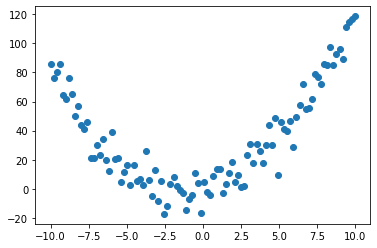

In [2]:
x,y=create_data()

import matplotlib.pyplot as plt

plt.scatter(x,y)

try to fit the above data by
$$
y = w_0 + w_1 x +w_2 x^2
$$
using least square method

compute
$(A^TA)^{-1}A^T y$

In [3]:
A=np.zeros((x.shape[0], 3))

for i in range(x.shape[0]):
    A[i,0]=1
    A[i,1]=x[i]
    A[i,2]=x[i]*x[i]

In [4]:
w=np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, y))

In [5]:
w

array([-0.66165838,  2.06896634,  1.01832558])

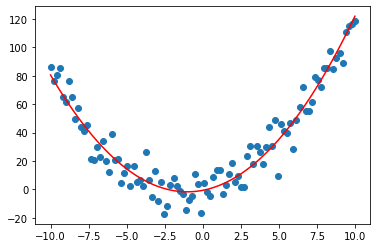

In [6]:
plt.plot(x, w[0]+w[1]*x+w[2]*x*x, 'r')
plt.scatter(x, y)

How about using `sklearn`?
Scikit-learn is a most popular library for machine learning in python. 

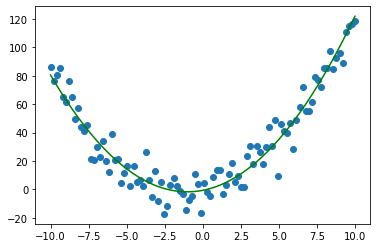

In [7]:
import sklearn.linear_model as lm

#define linear regression model
model=lm.LinearRegression()
#fit the model
model.fit(A, y)
#predict the results
results=model.predict(A)

plt.plot(x, results, 'g')
plt.scatter(x, y)